# Tutorial 15 - Visualization with `seaborn`

In the previous few tutorials we used the built-in plotting capabilities of `pandas` to create some useful financial graphs.  In this tutorial, we recreate those plots using the `seaborn` visualization package.

Like the `pandas` visualization functionality, `seaborn` is built on top of the `matplotlib` package.  As I've mentioned before, `matplotlib` allows for low level control over visualizations, which makes it very flexible.  However, this flexibility comes at the cost of complexity.  In contrast, `seaborn` provides a high level interface that allows for easy implementations of attractive graphs. 

The focus of `seaborn` is general statistical data visualizations, whereas `pandas` is more tailor-made for financial time series.

This tutorial is not meant to be a comprehensive introduction to `seaborn`.  Rather, my intention is to simply show you the code for a few graphs types that I have found useful in finance. For a thorough introduction to `seaborn`, I recommend working through the official tutorials that are linked in the Further Reading section - they are extremely well done, but quite long.

### Loading Packages

Let's load the packages that we will be using.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Line Graph - Prices, Returns, VIX

The following data is for SPY during 2014-2018.  It consists of prices, returns, realized volatility, and implied volatility.  Before we plot the data, we will need to:
1. refactor the `date` column to a `datetime`
1. then set the `date` column as the index.

In [2]:
df_spy_line = pd.read_csv('../data/seaborn_spy_line.csv')
df_spy_line['date'] = pd.to_datetime(df_spy_line['date']) # refactoring date
df_spy_line.set_index(['date'], inplace=True) # setting date column as index
df_spy_line.head()

adjusted    return  realized_vol    vix
date                                                 
2014-01-02  165.662872       NaN           NaN  14.23
2014-01-03  165.635696 -0.000164           NaN  13.76
2014-01-06  165.155701 -0.002902           NaN  13.55
2014-01-07  166.170044  0.006123           NaN  12.92
2014-01-08  166.206268  0.000218           NaN  12.87

#### Graphing with `pandas`

Recall that `pandas` allows us to quickly graph these four time series in a single figure.

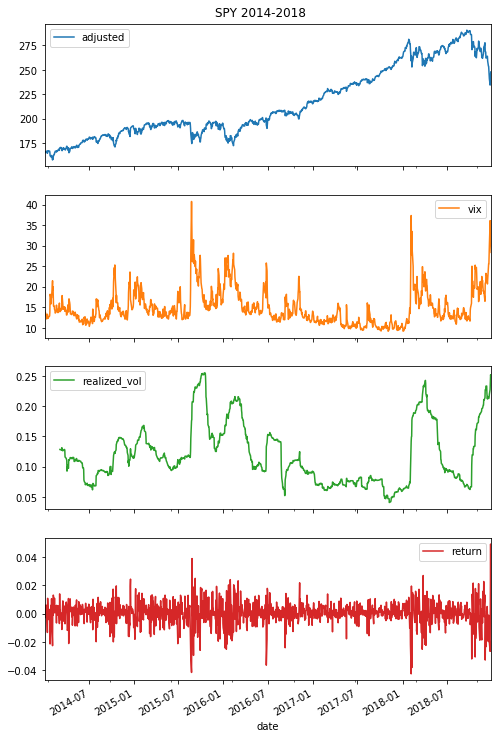

In [3]:
df_spy_line[['adjusted', 'vix', 'realized_vol', 'return']].\
    plot(
    subplots=True
    , figsize=(8, 12)
    , title='SPY 2014-2018'
    );
plt.subplots_adjust(top=0.96); # this adjusts the location of the title

#### Graphing with `seaborn`

Let's create similar graphs with `seaborn`.  Creating all four plots in a single graph is not as easy with `seaborn` and the code is a little confusing.  To keep things simple we will recreate two of the plots separately.

As a first step, we need to reset the index of `df_spy_line` because `seaborn` requires that the data come from the column of the `DataFrame`.

In [4]:
df_spy_line.reset_index(inplace=True)

Here is the code that generates the graph of the daily prices:

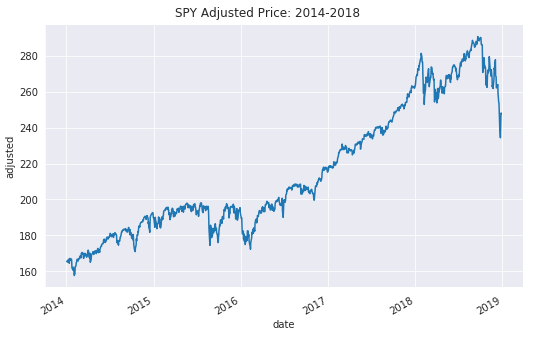

In [5]:
with sns.axes_style('darkgrid'):
    g = sns.relplot(x='date', y='adjusted', kind='line', data=df_spy_line, aspect=1.5)
    g.fig.autofmt_xdate()
    # creating and tweaking the title
    g.fig.suptitle('SPY Adjusted Price: 2014-2018')
    plt.subplots_adjust(top=0.93);

And here is the code produces the graph of the daily returns:

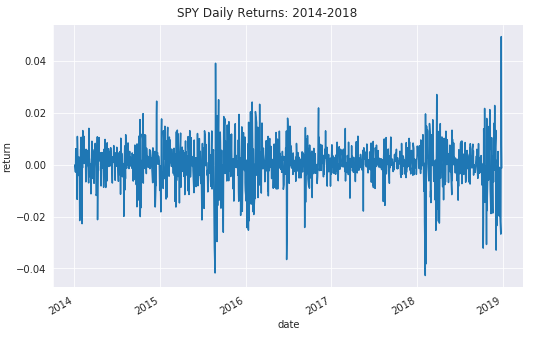

In [6]:
with sns.axes_style('darkgrid'):
    g = sns.relplot(x='date', y='return', kind='line', data=df_spy_line, aspect=1.5)
    g.fig.autofmt_xdate()
    # creating and tweaking the title
    g.fig.suptitle('SPY Daily Returns: 2014-2018');
    plt.subplots_adjust(top=0.93);

### Bar Graph - Monthly SPY Call PNLs

Our next data set consists of monthly pnls from the call trades detailed in `spy_call_pnl.csv`.

In [7]:
df_monthly_bar = pd.read_csv('../data/seaborn_monthly_pnl_bar.csv')
df_monthly_bar.head()

month  year  monthly_pnl
0      1  2018     0.091963
1      2  2018    -2.759090
2      3  2018    -0.340270
3      4  2018    -1.174222
4      5  2018     1.487206

#### Graphing with `pandas`

Recall that this code creates the barplot of the pnls by month using `pandas`:

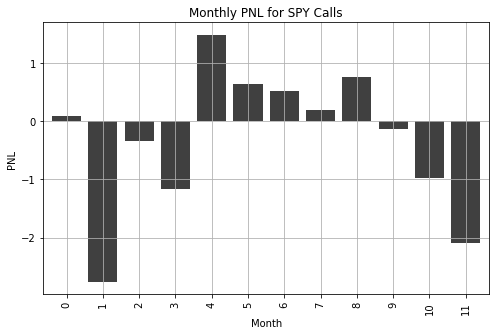

In [8]:
ax =\
    (df_monthly_bar['monthly_pnl']
        .plot(
            kind='bar'
            , color='k' # color is greay
            , grid=True # adding a grid
            , alpha=0.75 # translucence
            , width=0.8 # increasing the width of the bars
            , title='Monthly PNL for SPY Calls'
            , figsize=(8, 5) # modifying the figure size
        ));

ax.set_xlabel("Month"); # x-axis label
ax.set_ylabel("PNL");   # y-axis label

#### Graphing with `seaborn`

Here is the code that produces a similar graph in using `seaborn`:

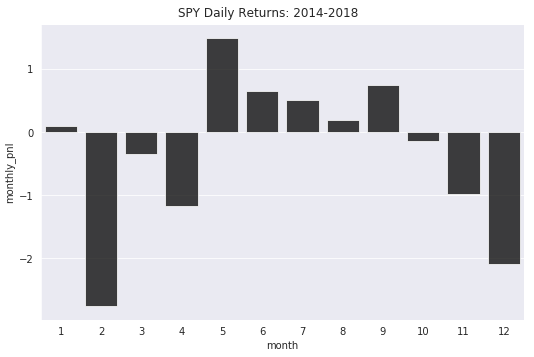

In [9]:
with sns.axes_style('darkgrid'):
    g = sns.catplot(
        x='month'
        , y='monthly_pnl'
        , kind='bar'
        , color='black'
        , alpha=0.75
        , height=5
        , aspect = 1.5
        , data=df_monthly_bar
    );
    plt.subplots_adjust(top=0.93);
    g.fig.suptitle('SPY Daily Returns: 2014-2018');

### Scatter Plot - SPY Returns vs VIX Change (*implied leverage*)

Our final data set consists of daily returns for SPY and daily changes in the VIX from 2014-2018. 

In [10]:
df_leverage_scatter = pd.read_csv('../data/seaborn_leverage_scatter.csv')
df_leverage_scatter.head()

date   spy_ret  vix_chng
0  2014-01-02       NaN       NaN
1  2014-01-03 -0.000164   -0.0047
2  2014-01-06 -0.002902   -0.0021
3  2014-01-07  0.006123   -0.0063
4  2014-01-08  0.000218   -0.0005

#### Graphing with `pandas`

Here is the `pandas` code that creates scatter plot of returns vs VIX changes:

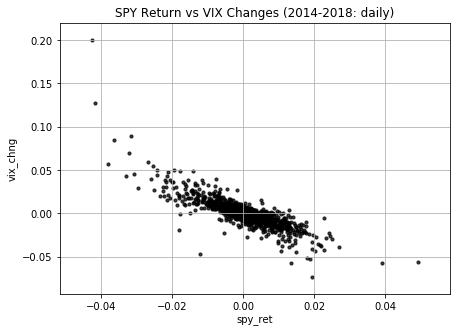

In [11]:
df_leverage_scatter.plot.scatter(
    x = 'spy_ret'
    , y = 'vix_chng'
    , grid=True   
    , c='k'
    , alpha=0.75
    , s=10  # changing the size of the dots
    , figsize=(7, 5)
    , title='SPY Return vs VIX Changes (2014-2018: daily)'
);

#### Graphing with `seaborn`

Here is the code for a similar graph using `seaborn`:

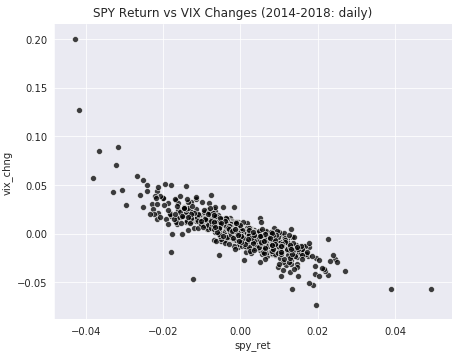

In [12]:
with sns.axes_style('darkgrid'):
    g = sns.relplot(
            x='spy_ret'
            , y='vix_chng'
            , data=df_leverage_scatter
            , color = 'black'
            , alpha = 0.75
            , height=5 
            , aspect=1.3
        );
    plt.subplots_adjust(top=0.93);
    g.fig.suptitle('SPY Return vs VIX Changes (2014-2018: daily)');

### Further Reading

*PDSH* - 4.14 - Visualization with Seaborn

Seaborn Official Tutorials - https://seaborn.pydata.org/tutorial.html (very good, but long)